# Advection Equation

## 1- FTCS

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

C:\Users\demet\Desktop\Numerical relativity by Bruno\notebooks\Demetry's Hw solutions\HW_1. 1-Advection Eq


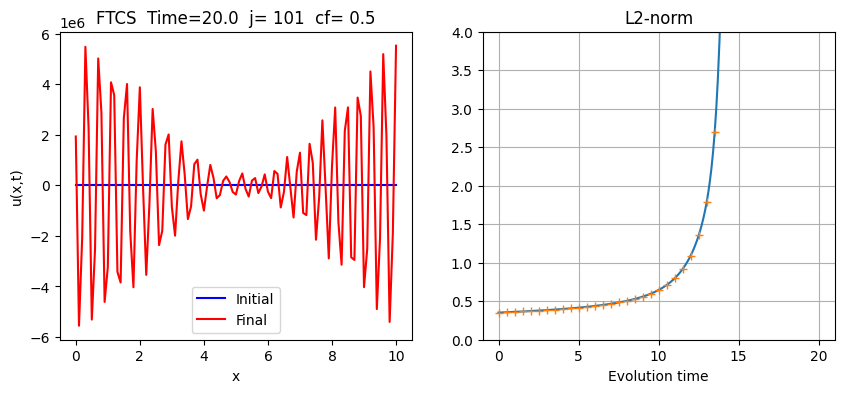

In [1]:
import numpy as np

#define the speed a
a= 1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

# print('nx=',nx)
# print('dx=',dx)
# print('dt=',dt)
# print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l_2 Norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)
#################################################################################
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images') # makedirs create a new directory in the operating system.

os.listdir('./')
###############################################################################

# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

# Solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to using periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))

    # Update the solution
    u_current = u_next.copy()


    #advance the time
    t += dt
    i += 1

    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
#######################################################################################

# Plot the final solution
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, u_initial, label='Initial', color= 'blue')
plt.plot(x, u_current, label='Final', color = 'red')
plt.title("FTCS  "+'Time='+str(round(t,2))+'  j= {}'.format(nx) + '  cf= {}'.format(cf))
plt.ylabel("u(x,t)")
plt.xlabel("x")
# plt.ylim(0,1.1)
plt.legend()
plt.subplot(1,2,2)
l2_saved=np.genfromtxt('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection/l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.ylim(0,4)
plt.xlabel("Evolution time")
plt.title("L2-norm")
plt.grid()


# Comments:
In general, the FTCS starts increasing u_next and continues to grow to infinity.

Increasing the speed a would make the function collapse faster.

Increasing j would make the function more stable.

Giving a very small value of cf preserves the function from growing for a longer time

The L2-norm is the same as the saved one for j=101, a=1, cf=5.

The function is unstable because it does not satisfy the CFL condition. Check lezione otto.


In [14]:
# set the directory where your images are stored
directory = "./images/"

# get the list of image files in the directory
files = os.listdir(directory)

# print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

# print(files)

##########################################################################################################
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images/'+file)
        writer.append_data(image)

files=[]
##############################################################
# Don't worry about the code in this cell, it is just to let you
# Display the movies you generated above in a Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170

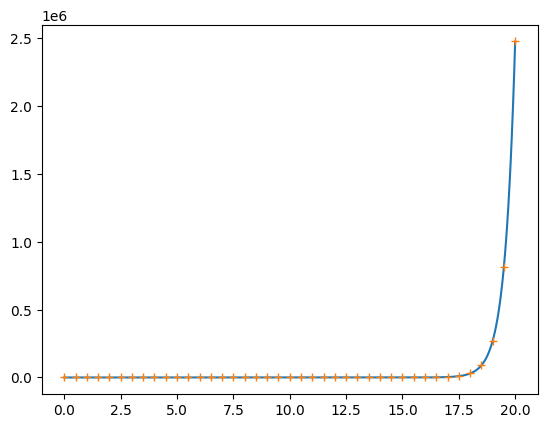

In [17]:
#Compare with data stored
l2_saved=np.genfromtxt('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection/l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()